In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report                   
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

train = pd.read_csv("drug200.csv")

In [206]:
#EDA 1
print(train.head(),"\n")
print("shape : ", train.shape, "\n")
print(train.describe())

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY 

shape :  (200, 6) 

              Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000


In [207]:
#EDA 2
str_label = train.columns
str_label = str_label.drop(labels = ['Age','Na_to_K'])

for label in str_label:
    print(train[label].unique())

print("\nTarget Data Check\n",train['Drug'].value_counts())

['F' 'M']
['HIGH' 'LOW' 'NORMAL']
['HIGH' 'NORMAL']
['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']

Target Data Check
 DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64


In [208]:
#Preprocessing 1 : Label Encoding
encoder = LabelEncoder()
def label_encoder(label):
    train[label] = encoder.fit_transform(train[label])

for label in str_label:
    label_encoder(label)

train

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,3
196,16,1,1,0,12.006,3
197,52,1,2,0,9.894,4
198,23,1,2,1,14.020,4


In [209]:
#Preprocessing 2 : Missing Values
train.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [227]:
#Preprocessing 3 : train_test_split
X = train[train.columns.drop('Drug')]
y = train['Drug']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [228]:
#Train 
#case 1 : knn
for k in range(3,11):
    knn = KNeighborsClassifier(n_neighbors = k)#k를 정해서 knn model의 객체를 만든다.
    knn.fit(X_train, y_train)#knn data로 학습을 시킨다.
    print("k가 ",k,"일때 (훈련 정확도, 검증 정확도) : ","(",accuracy_score(y_train,knn.predict(X_train)),","
          ,accuracy_score(y_test,knn.predict(X_test)),")")#훈련 결과를 확인하는 과정.

k가  3 일때 (훈련 정확도, 검증 정확도) :  ( 0.875 , 0.7 )
k가  4 일때 (훈련 정확도, 검증 정확도) :  ( 0.88125 , 0.675 )
k가  5 일때 (훈련 정확도, 검증 정확도) :  ( 0.85625 , 0.65 )
k가  6 일때 (훈련 정확도, 검증 정확도) :  ( 0.825 , 0.65 )
k가  7 일때 (훈련 정확도, 검증 정확도) :  ( 0.8 , 0.625 )
k가  8 일때 (훈련 정확도, 검증 정확도) :  ( 0.775 , 0.65 )
k가  9 일때 (훈련 정확도, 검증 정확도) :  ( 0.75625 , 0.65 )
k가  10 일때 (훈련 정확도, 검증 정확도) :  ( 0.78125 , 0.7 )


In [235]:
#case 2 : svm
scaler = StandardScaler()#standard scaler 객체를 만든다.
scaler.fit(X)#fit을 통해서 X의 데이터에 대해서 mean, var를 계산을 한다.(평균 표준편차 구한다)
X_scaled = scaler.transform(X)#fit과정이 끝나면 모든 X값에 대해서 앞서 구한 평균, 표준편차로 정규화를 진행한다.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

for cv in range(1,10):
    svm = LinearSVC(C=cv,loss='hinge')#모델 설정
    svm.fit(X_train,y_train)#fit으로 training input과 output을 넣어줘서 훈련을 수행한다. 즉, parameter를 구한다.
    pred = svm.predict(X_test)
    print("C가 ",cv,"일때 정확도는  :", accuracy_score(pred, y_test))

C가  1 일때 정확도는  : 0.875
C가  2 일때 정확도는  : 0.85
C가  3 일때 정확도는  : 0.85
C가  4 일때 정확도는  : 0.9
C가  5 일때 정확도는  : 0.9
C가  6 일때 정확도는  : 0.875
C가  7 일때 정확도는  : 0.9
C가  8 일때 정확도는  : 0.925
C가  9 일때 정확도는  : 0.9


/Users/bangbyeonghun/miniconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/bangbyeonghun/miniconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/bangbyeonghun/miniconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/bangbyeonghun/miniconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/bangbyeonghun/miniconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/bangbyeonghun/miniconda3/lib/python3.10/sit

In [223]:
#case 3 : Decision Tree
tree_e = DecisionTreeClassifier(criterion="entropy", max_depth = 4, min_samples_leaf = 3)
tree_g = DecisionTreeClassifier(criterion="gini", max_depth = 4, min_samples_leaf = 3)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

tree_e.fit(X_train, y_train)
tree_g.fit(X_train, y_train)

print ("Accuracy of entropy: ", accuracy_score(y_test,tree_e.predict(X_test))*100)            
print ("Report of entropy : ",  classification_report(y_test, tree_e.predict(X_test)))

print ("Accuracy of gini : ", accuracy_score(y_test,tree_e.predict(X_test))*100)         
print ("Report of gini: ",  classification_report(y_test, tree_e.predict(X_test)))

Accuracy of entropy:  97.5
Report of entropy :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.86      1.00      0.92         6
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00        14

    accuracy                           0.97        40
   macro avg       0.97      0.95      0.96        40
weighted avg       0.98      0.97      0.97        40

Accuracy of gini :  97.5
Report of gini:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.86      1.00      0.92         6
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00        14

    accuracy                           0.97        40
   macro avg       0.97      0.95      0.

[Text(0.625, 0.9, 'x[4] <= -0.173\ngini = 0.686\nsamples = 160\nvalue = [76, 17, 12, 15, 40]'),
 Text(0.5, 0.7, 'x[2] <= -0.5\ngini = 0.68\nsamples = 84\nvalue = [0, 17, 12, 15, 40]'),
 Text(0.25, 0.5, 'x[0] <= 0.466\ngini = 0.485\nsamples = 29\nvalue = [0, 17, 12, 0, 0]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 17\nvalue = [0, 17, 0, 0, 0]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 12, 0, 0]'),
 Text(0.75, 0.5, 'x[3] <= 0.03\ngini = 0.397\nsamples = 55\nvalue = [0, 0, 0, 15, 40]'),
 Text(0.625, 0.3, 'x[2] <= 0.72\ngini = 0.494\nsamples = 27\nvalue = [0, 0, 0, 15, 12]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 15\nvalue = [0, 0, 0, 15, 0]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 0, 0, 12]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 28\nvalue = [0, 0, 0, 0, 28]'),
 Text(0.75, 0.7, 'gini = 0.0\nsamples = 76\nvalue = [76, 0, 0, 0, 0]')]

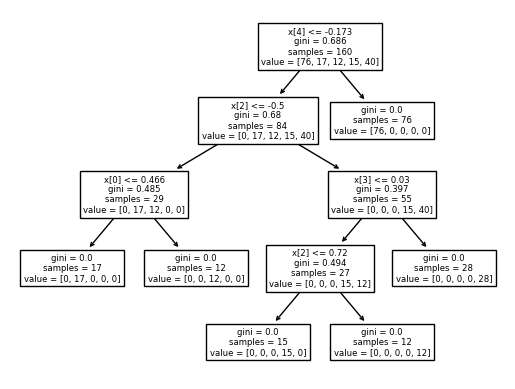

In [224]:
from sklearn import tree                                            # Visualizing Decision Tree
tree.plot_tree(tree_g)

[Text(0.625, 0.9, 'x[4] <= -0.173\nentropy = 1.954\nsamples = 160\nvalue = [76, 17, 12, 15, 40]'),
 Text(0.5, 0.7, 'x[2] <= -0.5\nentropy = 1.821\nsamples = 84\nvalue = [0, 17, 12, 15, 40]'),
 Text(0.25, 0.5, 'x[0] <= 0.466\nentropy = 0.978\nsamples = 29\nvalue = [0, 17, 12, 0, 0]'),
 Text(0.125, 0.3, 'entropy = 0.0\nsamples = 17\nvalue = [0, 17, 0, 0, 0]'),
 Text(0.375, 0.3, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 12, 0, 0]'),
 Text(0.75, 0.5, 'x[3] <= 0.03\nentropy = 0.845\nsamples = 55\nvalue = [0, 0, 0, 15, 40]'),
 Text(0.625, 0.3, 'x[2] <= 0.72\nentropy = 0.991\nsamples = 27\nvalue = [0, 0, 0, 15, 12]'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 15\nvalue = [0, 0, 0, 15, 0]'),
 Text(0.75, 0.1, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 0, 0, 12]'),
 Text(0.875, 0.3, 'entropy = 0.0\nsamples = 28\nvalue = [0, 0, 0, 0, 28]'),
 Text(0.75, 0.7, 'entropy = 0.0\nsamples = 76\nvalue = [76, 0, 0, 0, 0]')]

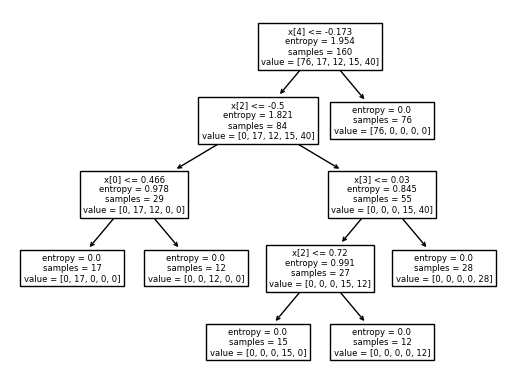

In [225]:
tree.plot_tree(tree_e)